In [4]:
%matplotlib qt
# %matplotlib inline

In [5]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [6]:
import os
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.viz import plot_raw
import matplotlib.pyplot as plt
import numpy as np
from moabb.paradigms import MotorImagery

from warnings import simplefilter
#ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

if os.path.basename(os.getcwd()) != "ML-for-Brain-Disorders_MEEG":
    os.chdir("ML-for-Brain-Disorders_MEEG")
db_basedir = os.getcwd() + "/MNE_samples/"

In [7]:
from moabb.datasets import Weibo2014 # 4 classes rest included

dataset=Weibo2014()
subject_id=1 # TODO: optimize the choice of the subj_id cf t-test between classes
data = dataset.get_data(subjects=[subject_id])
subject, session, run = subject_id, "session_0", "run_0"
raw = data[subject][session][run]
_ = raw.plot_sensors(show_names=True)
ch_eeg=['Fp1', 'Fpz', 'Fp2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'Fz',
       'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2',
       'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4',
       'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6',
       'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7',
       'PO5', 'PO3', 'POz', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'Oz', 'O2']
raw.info['bads']=['CB2', 'VEO', 'HEO', 'STIM014']
raw.plot_psd(fmax=55, picks=ch_eeg, average=True)

#_ = raw.plot(duration=10, start=10,  n_channels=30, color={'eeg':'darkblue'},
             #scalings=dict(eeg=90e-6))

Trial data de-meaned and concatenated with a buffer to create cont data


In [12]:
_ = raw.plot(duration=10, start=10,  n_channels=30, color={'eeg':'darkblue'},
             scalings=dict(eeg=90e-6), remove_dc=True,highpass=1)#, lowpass=40)

Setting up high-pass filter at 1 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 1.00 Hz: -6.02 dB

Channels marked as bad: ['CB2', 'VEO', 'HEO', 'STIM014']
Channels marked as bad: ['CB2', 'VEO', 'HEO', 'STIM014']


In [ ]:
fmin, fmax= 1, 45
events = ["left_hand", "right_hand", "feet", "rest"]
paradigm = MotorImagery(events=events, n_classes=len(events), fmin=fmin, fmax=fmax)
X, labels, meta = paradigm.get_data(dataset=dataset, subjects=[2], return_epochs=True)

X['left_hand'].plot(n_channels=30, scalings=dict(eeg=90e-6))
X['right_hand'].plot(n_channels=30, scalings=dict(eeg=90e-6))
X['feet'].plot(n_channels=30, scalings=dict(eeg=90e-6))
X['rest'].plot(n_channels=30, scalings=dict(eeg=90e-6))

# by default filter
X['left_hand'].plot_psd(picks='eeg', fmin=fmin, fmax=fmax)
X['right_hand'].plot_psd(picks='eeg', fmin=fmin, fmax=fmax)
X['feet'].plot_psd(picks='eeg', fmin=fmin, fmax=fmax)
X['rest'].plot_psd(picks='eeg', fmin=fmin, fmax=fmax)

Trial data de-meaned and concatenated with a buffer to create cont data


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


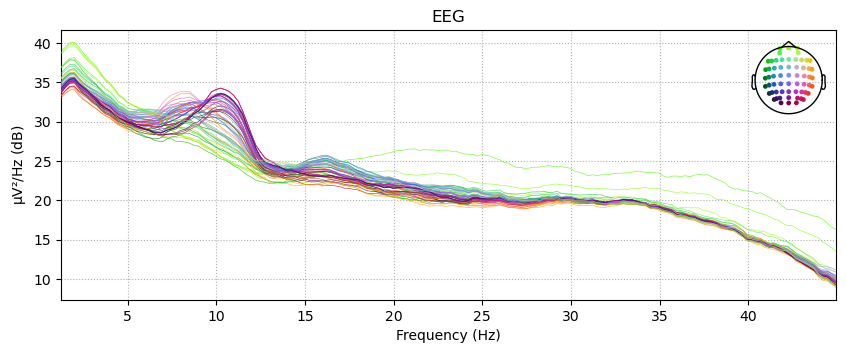